# Minority Game Memory Dynamics


Compare two simulations one with fixed memory and one with a distribution of memory, we argue that the one with the distribution would lead to a more efficient equilibrium.  

**Make sure to include** `import allow_local_imports` on top of every notebook in `notebooks/` dir to be able to use `lib/` modules.

## Import Libraries

In [1]:
import numpy as np
#import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from scipy.stats import norm

In [2]:
# Include this on top, as the first import 
# This must always be imported first. If you are restarting the notebook
# don't forget to run this cell first!
import allow_local_imports
# Use anything from lib package
# E.g.
#from lib.functions import simulate_simple_game
#simulate_simple_game()
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator
from lib.plots import default_plot


## Base Senario

In [3]:
# main parameter initialisation
m0 = 5
n_agents = 501
num_run = 500

#m_g1 = 5
#m_g2 = 3
#g1_size = 0.3
#g2_size = 0.7


In [4]:
'''
The following parameters have been initialized above:
    - n_agents
    - agent_cls = Agent
    - strategy_clss = [DefaultStrategy]
    - memory_generator = UniformMemoryGenerator(m0)
    - max_steps = 500

'''

times_0, attendances_0, mean_A_t_0, vol_A_t_0 = MinorityGame(
    n_agents=n_agents,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy, DefaultStrategy]),
            memory_generator=UniformMemoryGenerator(m0)
        ),
    }
).simulate_game(max_steps=num_run)

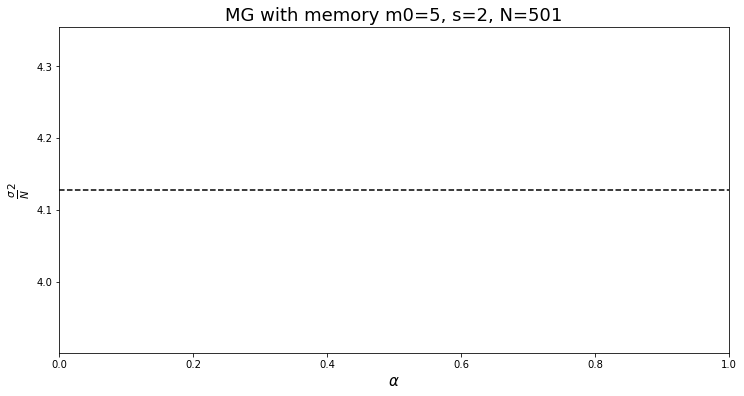

In [5]:
# plot base case
omega_0 = np.average(vol_A_t_0)/n_agents
alpha_0 = 2**m0/n_agents

fig, ax = plt.subplots(figsize=(12, 6))
ax.axhline(y=omega_0, color="k", linestyle="--")
#ax.axvline(x=alpha_0, color="k", linestyle="--")

plt.title("MG with memory m0=5, s=2, N=501", fontsize=18)
ax.set_xlabel(r"$\alpha$",fontsize=15)
ax.set_ylabel(r"$\frac{\sigma}{N}^2$",fontsize=15)

plt.show()

## Vary memory uniformly 

- Test 1: m is in the range(0,10)
- Test 2: m is 2, 7, 15 (ref to Moro(2004) Figure 2)


In [6]:
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

In [7]:
%%time
tot_omega_u = []
tot_alpha_u = []

for M in range (2,10):
    times_u, attendances_u, mean_A_t_u, vol_A_t_u = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            1: AgentFactory(
                #StrategyUpdatingAgent,
                Agent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy, DefaultStrategy],
                    #strategy_clss=[DefaultStrategy,DefaultStrategy],
                    #strategy_update_rate=0.1
                ),
                memory_generator=UniformMemoryGenerator(M)
            ),
        }
    ).simulate_game(max_steps=500)
    # in order to create the graph
    omega_u = np.average(vol_A_t_u)/n_agents
    alpha_u = 2**M/n_agents
    tot_omega_u.append(omega_u)
    tot_alpha_u.append(alpha_u)

CPU times: user 8min 8s, sys: 15.9 s, total: 8min 24s
Wall time: 48min 31s


In [8]:
tot_omega_u

[22.483257766215054,
 16.821467102452903,
 7.324844472199088,
 4.313761785067556,
 2.2302708758692735,
 1.2415404241504817,
 1.1988996300093446,
 1.0151059926509949]

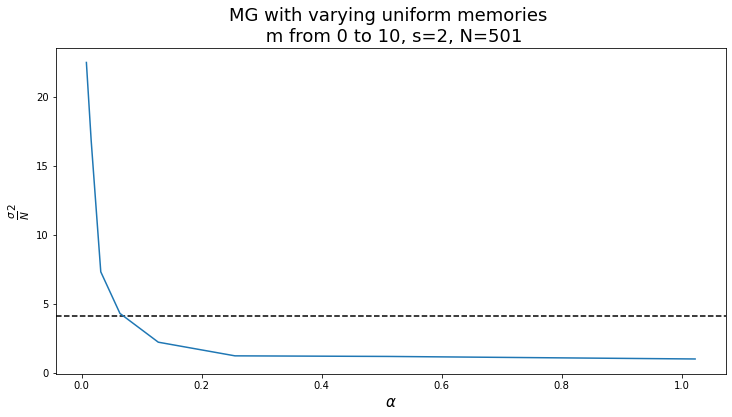

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.axhline(y=omega_0, color="k", linestyle="--")
ax.plot(tot_alpha_u, tot_omega_u)
ax.set_xlabel(r"$\alpha$",fontsize=15)
ax.set_ylabel(r"$\frac{\sigma}{N}^2$",fontsize=15)

plt.title("MG with varying uniform memories \n m from 0 to 10, s=2, N=501", fontsize=18)

plt.show()

### Test 2

![alt text](pics/MoroFigure2.png)

In [10]:
%%time
tot_time_u2 = []
tot_At_u2 = []
tot_omega_u2 = []
tot_alpha_u2 = []

m_ls = np.array([2,7,15])
for M in m_ls:
    times_u2, attendances_u2, mean_A_t_u2, vol_A_t_u2 = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            1: AgentFactory(
                #StrategyUpdatingAgent,
                Agent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy, DefaultStrategy],
                    #strategy_clss=[DefaultStrategy,DefaultStrategy],
                    #strategy_update_rate=0.1
                ),
                memory_generator=UniformMemoryGenerator(M)
            ),
        }
    ).simulate_game(max_steps=500)
    # in order to create the graph
    omega_u2 = np.average(vol_A_t_u2)/n_agents
    alpha_u2 = 2**M/n_agents
    tot_time_u2.append(times_u2)
    tot_At_u2.append(attendances_u2)
    tot_omega_u2.append(omega_u2)
    tot_alpha_u2.append(alpha_u2)

CPU times: user 2min 59s, sys: 4.52 s, total: 3min 4s
Wall time: 11min 15s


<ipython-input-22-c6c9b2297386>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([11,12], labels=labels, loc='upper right')


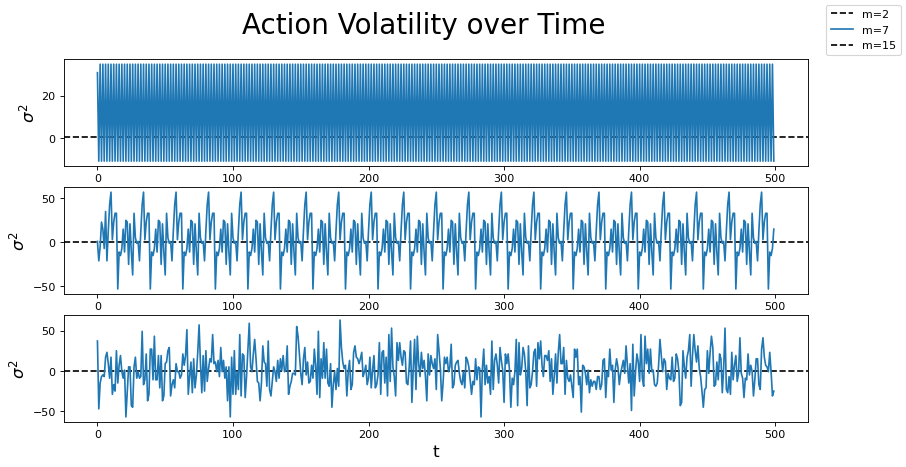

In [22]:
fig,ax=plt.subplots(3,1,figsize=(12,6), dpi=80)
fig.suptitle('Action Volatility over Time', fontsize=25)

for i in range(0,3):
    ax[i].axhline(y=omega_0, color="k", linestyle="--")
    ax[i].plot(tot_time_u2[i], tot_At_u2[i], label=r"$\sigma^2$")
    ax[i].set_xlabel("t",fontsize=15)
    ax[i].set_ylabel(r"$\sigma^2$",fontsize=15)

labels=["m=2", "m=7", "m=15"]

fig.legend([11,12], labels=labels, loc='upper right')
plt.show()

# References

In [ ]:
times, attendances, mean_At, volatility_At = MinorityGame(
    n_agents=201,
    factory_dict={
        0.3: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy, DefaultStrategy]),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
        0.5: AgentFactory(
            StrategyUpdatingAgent,
            agent_kwargs=dict(
                strategy_clss=[FiftyFiftyStrategy, DefaultStrategy, AlwaysOneStrategy],
                strategy_update_rate=0.8
            ),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
        0.2: AgentFactory(
            Agent,
            agent_kwargs=dict(
                strategy_clss=[FiftyFiftyStrategy, DefaultStrategy]
            ),
            memory_generator=UniformMemoryGenerator(m=2)
        ),
    }
).simulate_game()

default_plot(times, attendances)

In [ ]:
def integer_state(history):
    """
    maps a list of m combinations of 1s and -1s to a unique number
    INPUT| a list of the last m outputs of the game
    OUTPUT| a unique integer
    """
    state = 0
    p = len(history)-1
    for i in history:
        if i == 1:
            state += 2**p
        p -= 1
    return state
def maximum_index(score):
    """
    Returns the index of the maximum score (if more than one max, selects randomly)
    """
    maximos = np.argwhere(score == np.amax(score)).flatten()
    return np.random.choice(maximos)

def minority(A):
    """
    Return the winner action
    """
    if A < 0:
        return 1
    elif A > 0:
        return -1
    else:
        return 2*random.randint(0, 1)-1

def update_scores(N, S, A, strategies, state, scores, winner):
    for n in range(N):
        for s in range(S):
            if strategies[n][s][state] == winner:
                scores[n][s] += 1  # g[A(t)] = sign(A(t))
                #scores[n][s] += A
            else:
                scores[n][s] -= 1  # g[A(t)] = sign(A(t))
                #scores[n][s] += A
    return scores

def one_game(N, S, strategies, history, scores):
    actions = np.zeros(N)
    state = integer_state(history)
    for i in range(N):
        index_strategy = maximum_index(scores[i])
        actions[i] = strategies[i][index_strategy][state]
    A = np.sum(actions)
    winner = minority(A)
    scores = update_scores(N, S, A, strategies, state, scores, winner)
    history = np.concatenate((history[1:], [winner]))
    return A, history, scores

def one_simulation(N, S, M, T, imprime=10**8):
    history = 2*np.random.randint(2, size=M)-1
    strategies = 2*np.random.randint(2, size=(N, S, 2**M))-1
    scores = np.zeros((N, S))
    attendances = np.zeros(T)
    times = np.zeros(T)
    meanA = np.zeros(T)  # to control the convergence
    # simulation
    for t in range(T):
        if (t+1) % imprime == 0:
            print('         t={}/{}'.format(t+1, T))
        A, history, scores = one_game(N, S, strategies, history, scores)
        times[t] = t
        attendances[t] = A
        meanA[t] = np.mean(attendances[:t+1])  # mean of the attendance so far
    return times, attendances, meanA

# run the simulation
N1 = 501 #num of agents
S1 = 2 #strategy
M1 = 3 #memory
times, attendances, meanA = one_simulation(N1, S1, M1, T=5000, imprime = 500)

history = 2*np.random.randint(2, size=M1)-1
strategies = 2*np.random.randint(2, size=(N1, S1, 2**M1))-1
print(history)
print(strategies)

fig, ax = plt.subplots(figsize = (12,6))

ax.axhline(y=0, color='k', linestyle='--')
ax.plot(times, meanA, '-', label = r'$<A(t)>$')
ax.set_xlabel('t')
ax.set_ylabel('<A(t)>')
